In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("showwcase_sessions.csv")

In [3]:
data.head()

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,False,True,True,True,False,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,True,True,True,True,False,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,True,True,True,True,False,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,True,True,True,False,False,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,True,True,False,True,False,3.0,16.0,0.0,1405.0,0.0,1679.0


In [4]:
data.shape

(302, 14)

In [5]:
data.isnull().sum()

session_id                2
customer_id               2
login_date                2
projects_added            2
likes_given               2
comment_given             2
inactive_status           2
bug_occured               2
session_projects_added    2
session_likes_given       3
session_comments_given    2
inactive_duration         2
bugs_in_session           2
session_duration          2
dtype: int64

In [6]:
#dropped all null values and unneeded columns
data = data.dropna()
data = data.drop(columns=['projects_added','likes_given','comment_given','inactive_status','bug_occured'])
data

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205.0,80746.0,10/30/19,0.0,24.0,3.0,1146.0,0.0,1564.0
1,624241.0,24520.0,10/30/19,2.0,3.0,5.0,133.0,0.0,1766.0
2,111002.0,32047.0,10/30/19,1.0,5.0,5.0,1571.0,0.0,2230.0
3,545113.0,23404.0,10/30/19,1.0,10.0,21.0,0.0,0.0,633.0
4,750269.0,40235.0,10/30/19,3.0,16.0,0.0,1405.0,0.0,1679.0
...,...,...,...,...,...,...,...,...,...
295,944212.0,40572.0,10/1/19,3.0,13.0,0.0,1174.0,0.0,2255.0
296,558332.0,87323.0,10/1/19,2.0,0.0,0.0,97.0,0.0,1692.0
297,643880.0,51243.0,10/1/19,2.0,0.0,0.0,906.0,0.0,1990.0
298,844518.0,23083.0,10/1/19,1.0,0.0,0.0,139.0,0.0,1113.0


In [7]:
data.isnull().sum()

session_id                0
customer_id               0
login_date                0
session_projects_added    0
session_likes_given       0
session_comments_given    0
inactive_duration         0
bugs_in_session           0
session_duration          0
dtype: int64

In [8]:
data.shape

(299, 9)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 299 entries, 0 to 299
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   session_id              299 non-null    float64
 1   customer_id             299 non-null    float64
 2   login_date              299 non-null    object 
 3   session_projects_added  299 non-null    float64
 4   session_likes_given     299 non-null    float64
 5   session_comments_given  299 non-null    float64
 6   inactive_duration       299 non-null    float64
 7   bugs_in_session         299 non-null    float64
 8   session_duration        299 non-null    float64
dtypes: float64(8), object(1)
memory usage: 23.4+ KB


In [10]:
data.describe()

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,529534.652174,45028.849498,1.618729,10.458194,2.408027,731.638796,1.237458,1190.414716
std,280232.153769,26426.038013,1.336799,9.474839,2.251190,839.247660,1.759100,686.871418
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,307856.000000,23579.000000,1.000000,0.000000,0.500000,0.000000,0.000000,614.000000
50%,552796.000000,39475.000000,2.000000,9.000000,2.000000,312.000000,0.000000,1152.000000
75%,802738.000000,73245.000000,3.000000,19.000000,4.000000,1525.500000,2.500000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


In [11]:
data_cust = pd.DataFrame(data.groupby(by="customer_id", as_index=False).sum())
data_cust

,customer_id,session_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,10246.0,733949.0,8.0,53.0,3.0,2435.0,9.0,2863.0
1,12407.0,4458042.0,17.0,82.0,24.0,6038.0,6.0,12266.0
2,12496.0,3551658.0,9.0,53.0,23.0,4878.0,4.0,6279.0
3,12940.0,2640285.0,2.0,89.0,15.0,3521.0,3.0,6421.0
4,14354.0,9383233.0,31.0,150.0,38.0,8964.0,15.0,17437.0
5,19348.0,378958.0,1.0,22.0,1.0,2195.0,0.0,1565.0
6,19374.0,827919.0,1.0,0.0,4.0,0.0,0.0,1633.0
7,20548.0,878079.0,3.0,25.0,0.0,1801.0,1.0,258.0
8,23083.0,8175572.0,12.0,112.0,14.0,12030.0,16.0,12135.0
9,23404.0,10915926.0,23.0,207.0,62.0,13510.0,33.0,24714.0


In [12]:
data_cust.describe()

,customer_id,session_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,48.000000,4.800000e+01,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,47366.708333,3.298560e+06,10.083333,65.145833,15.000000,4557.500000,7.708333,7415.291667
std,29010.790766,3.436298e+06,9.821456,65.240305,15.430007,4724.470728,8.417202,7547.024898
min,10246.000000,1.097870e+05,0.000000,0.000000,0.000000,0.000000,0.000000,103.000000
25%,23571.250000,5.928968e+05,2.000000,11.500000,2.750000,609.500000,0.000000,1320.000000
50%,39855.000000,2.120640e+06,7.500000,46.000000,11.500000,2830.000000,5.000000,5694.500000
75%,74275.500000,4.677795e+06,17.500000,94.750000,23.250000,7112.500000,11.250000,12167.750000
max,98653.000000,1.145220e+07,38.000000,230.000000,62.000000,16527.000000,33.000000,30356.000000


In [13]:
data_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             48 non-null     float64
 1   session_id              48 non-null     float64
 2   session_projects_added  48 non-null     float64
 3   session_likes_given     48 non-null     float64
 4   session_comments_given  48 non-null     float64
 5   inactive_duration       48 non-null     float64
 6   bugs_in_session         48 non-null     float64
 7   session_duration        48 non-null     float64
dtypes: float64(8)
memory usage: 3.4 KB


[(0, 25), Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Login Date')]

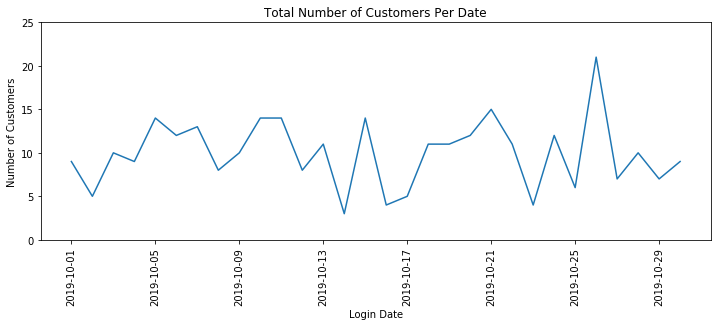

In [14]:
plt.figure(figsize=(12,4))
plt.xticks(rotation=90)
plt.title("Total Number of Customers Per Date")
data['login_date'] = pd.to_datetime(data['login_date'])
data_login = pd.DataFrame(data['login_date'].value_counts().sort_index())
sns.lineplot(x = data_login.index,y=data_login['login_date']).set(ylabel="Number of Customers",xlabel="Login Date",ylim=(0,25))

[Text(0, 0.5, 'Number of Sessions'), Text(0.5, 0, 'Amount of Projects')]

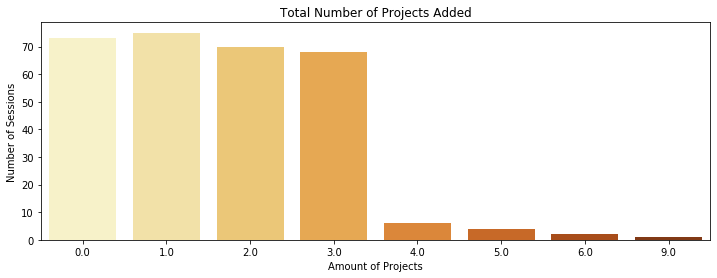

In [15]:
plt.figure(figsize=(12,4))
plt.title("Total Number of Projects Added")
projects_sess = sns.countplot(data['session_projects_added'],palette="YlOrBr")
projects_sess.set(ylabel="Number of Sessions",xlabel="Amount of Projects")

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Amount of Projects')]

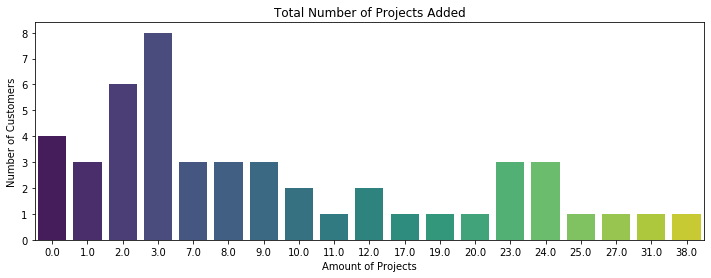

In [16]:
plt.figure(figsize=(12,4))
plt.title("Total Number of Projects Added")
projects_cust = sns.countplot(data_cust['session_projects_added'],palette="viridis")
projects_cust.set(ylabel="Number of Customers",xlabel="Amount of Projects")

[Text(0.5, 0, 'Amount of Seconds')]

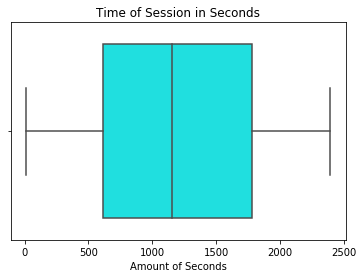

In [17]:
plt.title("Time of Session in Seconds")
session = sns.boxplot(data['session_duration'],color="cyan")
session.set(xlabel="Amount of Seconds")

[Text(0, 0.5, 'Number of Sessions'), Text(0.5, 0, 'Amount of Bugs')]

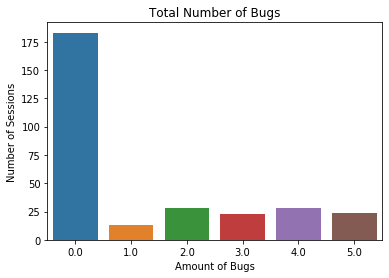

In [18]:
plt.title("Total Number of Bugs")
bugs = sns.countplot(data['bugs_in_session'])
bugs.set(ylabel="Number of Sessions",xlabel="Amount of Bugs")

[Text(0, 0.5, 'Number of Sessions'), Text(0.5, 0, 'Amount of Likes')]

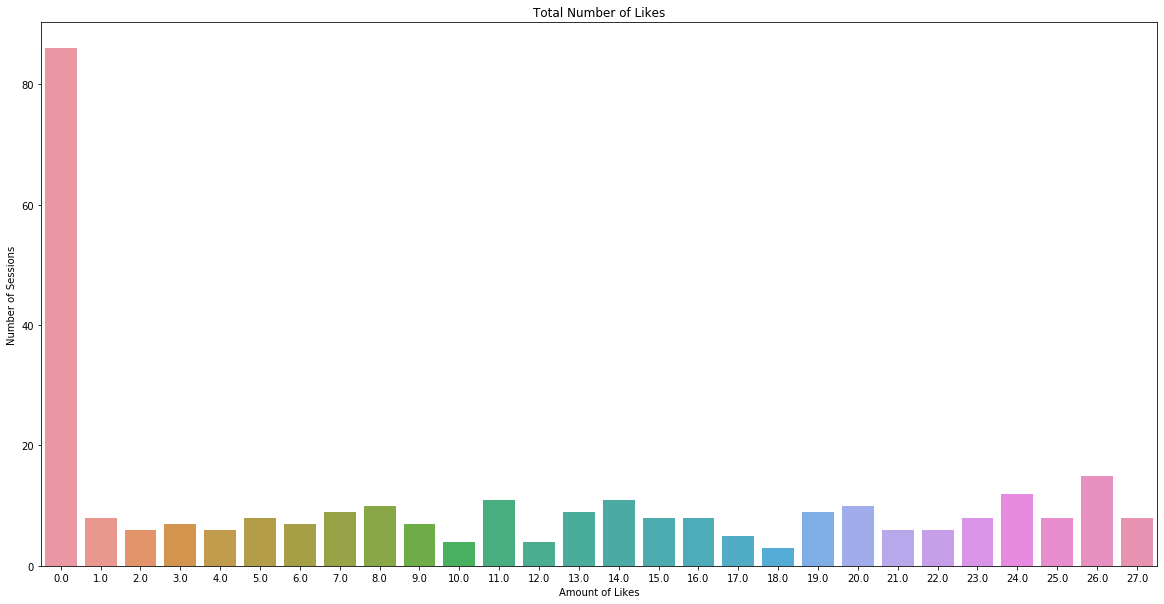

In [19]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Likes")
likes = sns.countplot(data['session_likes_given'])
likes.set(ylabel="Number of Sessions",xlabel="Amount of Likes")

[Text(0, 0.5, 'Number of Sessions'), Text(0.5, 0, 'Amount of Comments')]

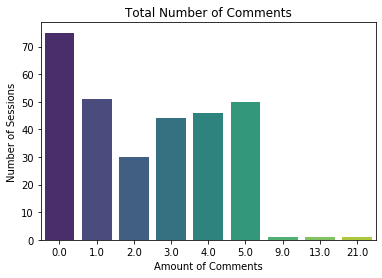

In [20]:
plt.title("Total Number of Comments")
comments = sns.countplot(data['session_comments_given'],palette="viridis")
comments.set(ylabel="Number of Sessions",xlabel="Amount of Comments")

[Text(0, 0.5, 'Number of Comments'), Text(0.5, 0, 'Number of Likes')]

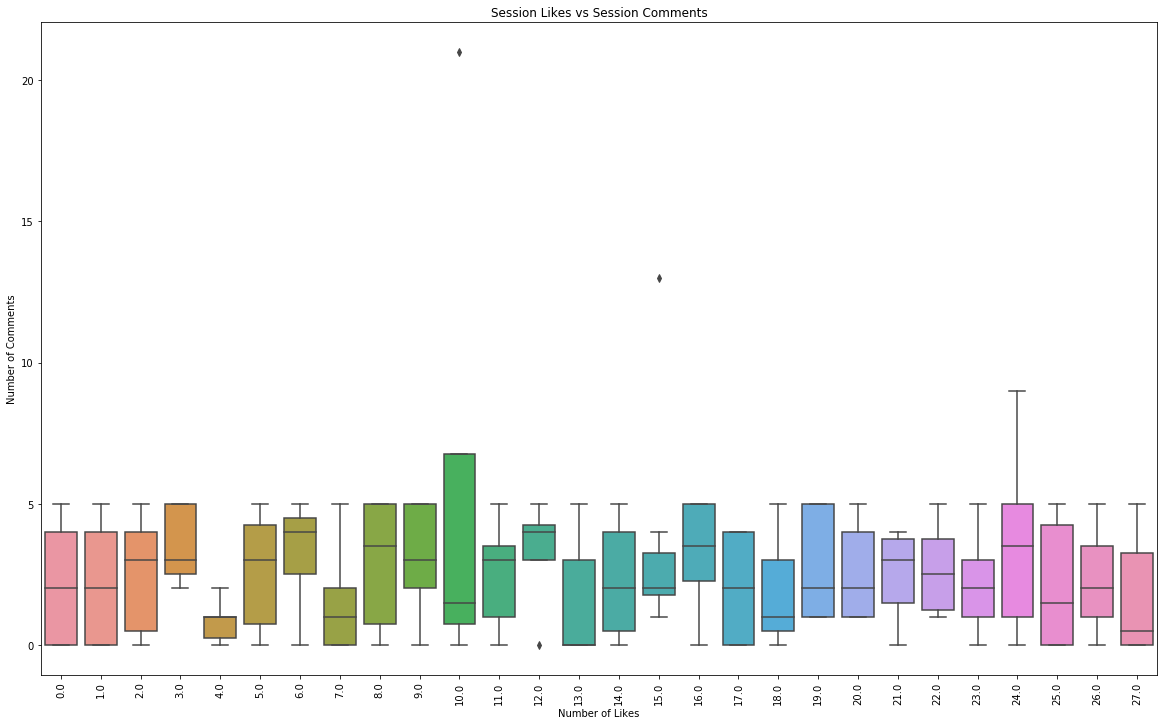

In [21]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.title("Session Likes vs Session Comments")
sns.boxplot(x="session_likes_given",y="session_comments_given",data=data).set(ylabel="Number of Comments",xlabel="Number of Likes")

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Amount of Likes')]

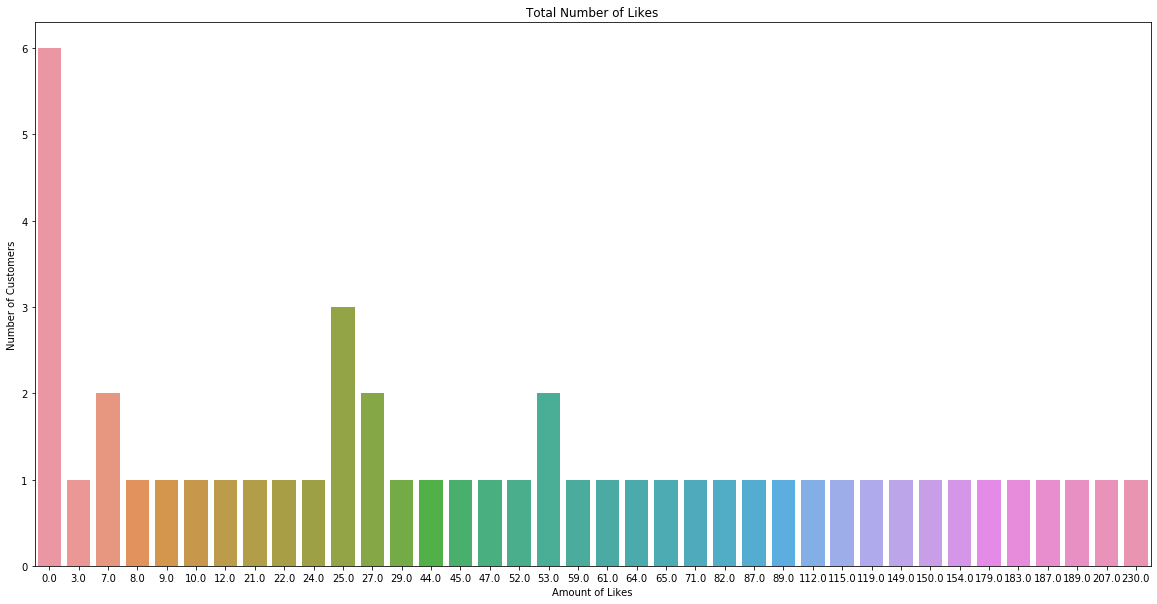

In [22]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Likes")
likes_cust = sns.countplot(data_cust['session_likes_given'])
likes_cust.set(ylabel="Number of Customers",xlabel="Amount of Likes")

[Text(0, 0.5, 'Number of Customers'), Text(0.5, 0, 'Amount of Comments')]

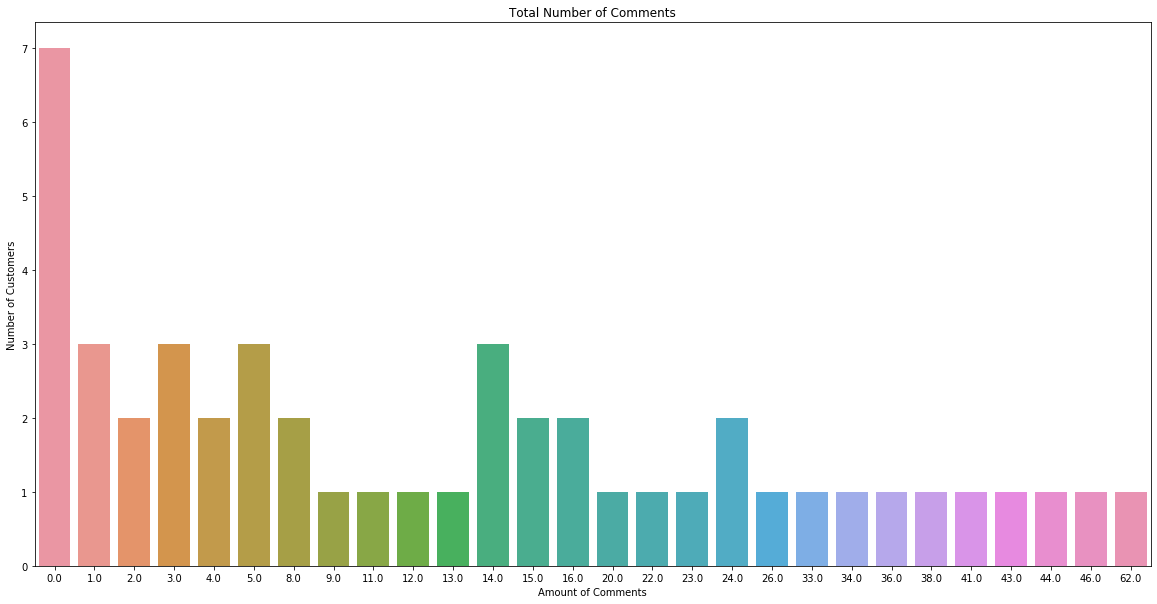

In [23]:
plt.figure(figsize=(20,10))
plt.title("Total Number of Comments")
comments = sns.countplot(data_cust['session_comments_given'])
comments.set(ylabel="Number of Customers",xlabel="Amount of Comments")

[Text(0, 0.5, 'Number of Comments'), Text(0.5, 0, 'Number of Likes')]

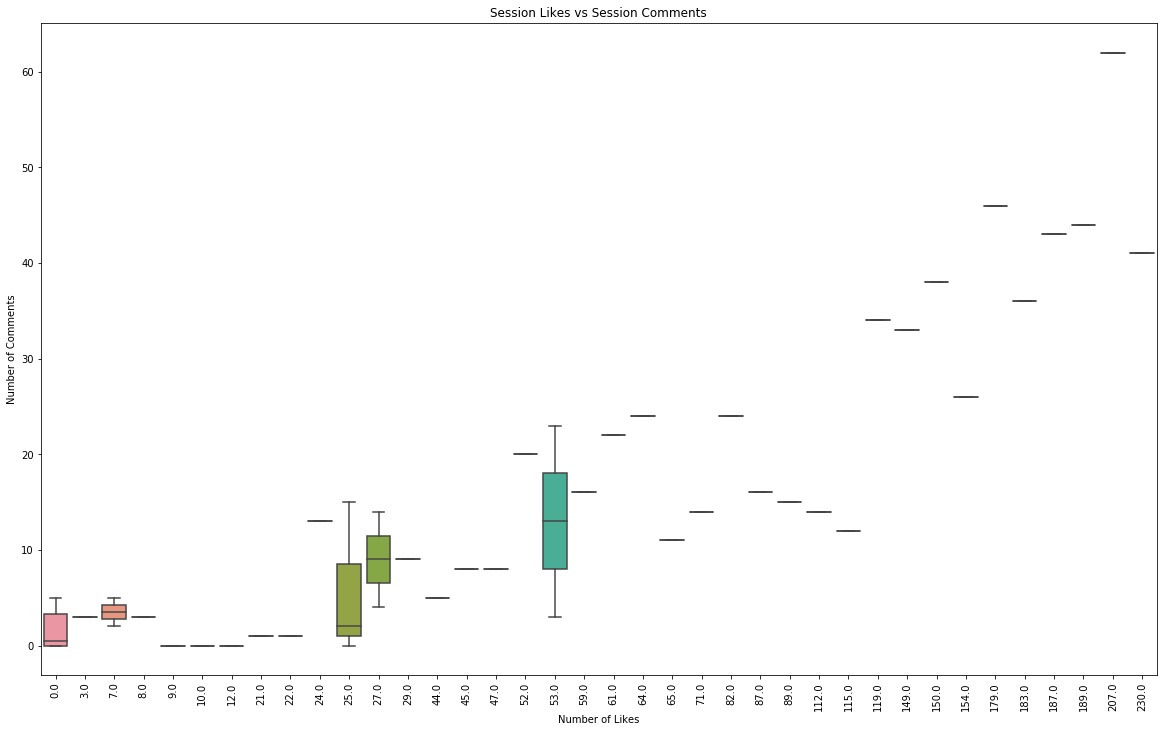

In [24]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=90)
plt.title("Session Likes vs Session Comments")
sns.boxplot(x="session_likes_given",y="session_comments_given",data=data_cust).set(ylabel="Number of Comments",xlabel="Number of Likes")

In [25]:
active_inactive = pd.DataFrame()
active_inactive['Customer ID'] = data_cust['customer_id']
active_inactive["Active"] = data_cust['session_duration']-data_cust['inactive_duration']
active_inactive['Inactive'] = data_cust['inactive_duration']
active_inactive

,Customer ID,Active,Inactive
0,10246.0,428.0,2435.0
1,12407.0,6228.0,6038.0
2,12496.0,1401.0,4878.0
3,12940.0,2900.0,3521.0
4,14354.0,8473.0,8964.0
5,19348.0,-630.0,2195.0
6,19374.0,1633.0,0.0
7,20548.0,-1543.0,1801.0
8,23083.0,105.0,12030.0
9,23404.0,11204.0,13510.0


In [26]:
activity_conditions = [
    (active_inactive['Active'] < 0),
    (active_inactive['Active'] >= 0) & (active_inactive['Active'] < 2500),
    (active_inactive['Active'] >= 2500) & (active_inactive['Active'] < 7500),
    (active_inactive['Active'] >= 7500)
    ]
activity_level = ['Negative Value', 'Not Very Active', 'Active', 'Very Active']
active_inactive['Activity Level'] = np.select(activity_conditions, activity_level)
active_inactive

,Customer ID,Active,Inactive,Activity Level
0,10246.0,428.0,2435.0,Not Very Active
1,12407.0,6228.0,6038.0,Active
2,12496.0,1401.0,4878.0,Not Very Active
3,12940.0,2900.0,3521.0,Active
4,14354.0,8473.0,8964.0,Very Active
5,19348.0,-630.0,2195.0,Negative Value
6,19374.0,1633.0,0.0,Not Very Active
7,20548.0,-1543.0,1801.0,Negative Value
8,23083.0,105.0,12030.0,Not Very Active
9,23404.0,11204.0,13510.0,Very Active


In [27]:
active_inactive_data=pd.DataFrame()
active_inactive_data['Customer ID'] = active_inactive['Customer ID']
active_inactive_data['Active'] = active_inactive['Active']
active_inactive_data['Inactive'] = active_inactive['Inactive']
active_inactive_data = active_inactive.melt(id_vars=['Customer ID'],value_vars=['Active','Inactive'],var_name="Activity Type",value_name="Number of Seconds")
active_inactive_data

,Customer ID,Activity Type,Number of Seconds
0,10246.0,Active,428.0
1,12407.0,Active,6228.0
2,12496.0,Active,1401.0
3,12940.0,Active,2900.0
4,14354.0,Active,8473.0
...,...,...,...
91,93486.0,Inactive,0.0
92,96254.0,Inactive,2681.0
93,98346.0,Inactive,1248.0
94,98476.0,Inactive,0.0


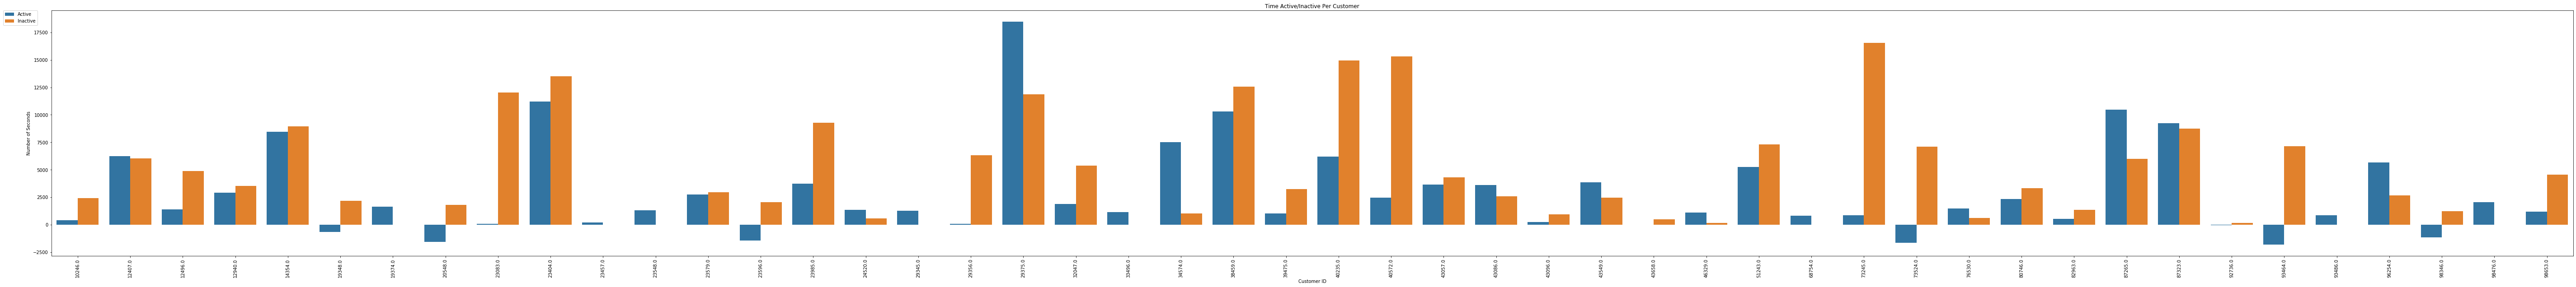

In [28]:
plt.figure(figsize=(100,10))
plt.xticks(rotation=90)
plt.title("Time Active/Inactive Per Customer")
activity = sns.barplot(x="Customer ID",y="Number of Seconds",hue="Activity Type",data=active_inactive_data)
activity.legend(loc='upper left',bbox_to_anchor=(-0.02,1.01))

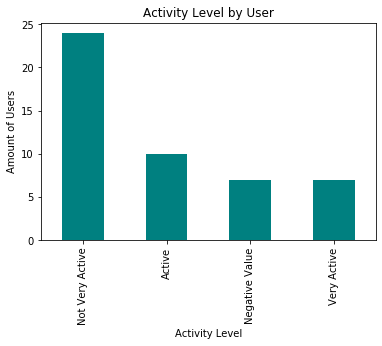

In [29]:
plt.xlabel("Activity Level")
plt.ylabel("Amount of Users")
active_inactive['Activity Level'].value_counts().plot.bar(color="teal",title="Activity Level by User")

In [30]:
corr = data.corr()
corr = corr.drop(columns=['customer_id','session_id'])
corr=corr.drop(['customer_id','session_id'])
corr

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
session_projects_added,1.000000,-0.014775,-0.065215,0.001022,-0.038429,0.018398
session_likes_given,-0.014775,1.000000,0.048944,-0.076404,0.032711,-0.057032
session_comments_given,-0.065215,0.048944,1.000000,0.011550,-0.020312,0.010574
inactive_duration,0.001022,-0.076404,0.011550,1.000000,0.137024,0.073598
bugs_in_session,-0.038429,0.032711,-0.020312,0.137024,1.000000,-0.032970
session_duration,0.018398,-0.057032,0.010574,0.073598,-0.032970,1.000000


In [31]:
cust_corr=data_cust.corr()
cust_corr = cust_corr.drop(columns=['customer_id','session_id'])
cust_corr=cust_corr.drop(['customer_id','session_id'])
cust_corr

,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
session_projects_added,1.000000,0.894272,0.863727,0.786661,0.843703,0.843318
session_likes_given,0.894272,1.000000,0.916493,0.867820,0.906137,0.927354
session_comments_given,0.863727,0.916493,1.000000,0.829809,0.892658,0.934712
inactive_duration,0.786661,0.867820,0.829809,1.000000,0.857983,0.883622
bugs_in_session,0.843703,0.906137,0.892658,0.857983,1.000000,0.883983
session_duration,0.843318,0.927354,0.934712,0.883622,0.883983,1.000000


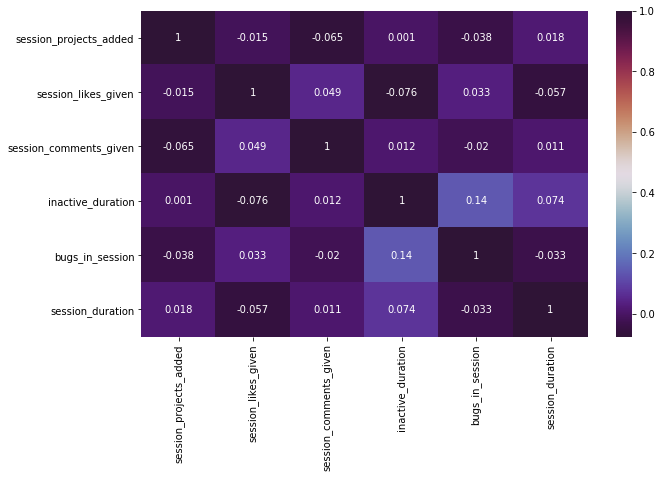

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(data = corr, cmap="twilight_shifted", annot=True)

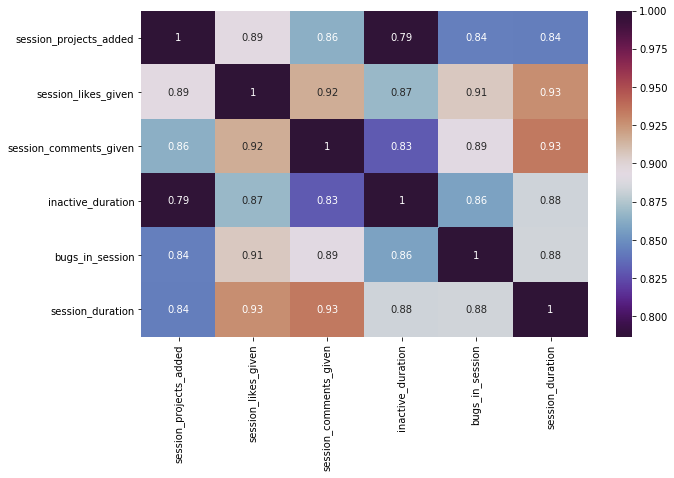

In [33]:
plt.figure(figsize=(10,6))
sns.heatmap(data = cust_corr,cmap="twilight_shifted", annot=True)